### 웹 크롤링 한 결과 파일을 가져와 형태소 분석 및 워드클라우드 작성하기


1. 한글 글꼴 설치

In [10]:
### 코랩 한글 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (46.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129504 files and dir

In [11]:
# 모듈 설치
!pip install konlpy
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 32.7 MB/s eta 0:00:00
--2023-01-19 06:24:56--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-01-19 06:24:57--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb6f09ef637ddd62b3189fe1952.dl.dropboxusercontent.com/cd/0/get/B03dzC615pHcPGYuL0YaHpvzlQfo_DeUHdD5OXc4NOhUxT_ovLYLxc1XVI1EITRuXg

2. 드라이브 연결

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. 필요 모듈 연결하기

In [13]:
import pandas as pd
from konlpy.tag import Mecab
from time import time

filepath='/content/drive/MyDrive/Notability/Github/Python_Machine_Learning/etc/'
df=pd.read_csv(filepath+'부산서면맛집.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ques_date  1137 non-null   object
 1   title      1137 non-null   object
 2   question   1137 non-null   object
 3   answer     1137 non-null   object
dtypes: object(4)
memory usage: 35.7+ KB


In [14]:
df[df['question']=='내용없음']

,ques_date,title,question,answer
0,2022.01.27,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,서면은 워낙 번화가다 보니까 확실히 저도 맛집을 찾는게 어렵긴 하더라구요저...
24,2022.07.12,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,쇼쿠지 서면점 부산광역시 부산진구 동천로 97-4 1층 ...
50,2019.10.07,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,라자냐식당이요
51,2019.10.07,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,해성막창 곱창전골
52,2019.10.07,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,파스타빌라 괜찮았어요
...,...,...,...,...
1024,2019.10.07,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,해성막창 곱창전골
1025,2019.10.07,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,파스타빌라 괜찮았어요
1026,2019.10.07,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,https://store.naver.com/restaurants/detail...
1027,2019.10.07,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,여행에서 가장 오래 기억에 남는 것은 맛집투어(식도락)이고...인생의 절반이...


4. 텍스트 문장 단어화(명사:NNG)
- answer에서 명사만 추출

In [15]:
from konlpy.tag import Mecab
from time import time

# 객체 생성
mecab = Mecab()
# df['answer']를 이용해 문장단위도 명사 추출후 nouns 변수에 리스트로 저장
start=time()

nouns = [ mecab.nouns(t) for t in df['answer']]

print(f'{time()-start} sec')

import pickle

with open(filepath + 'nouns_answers.pickle', 'wb') as f:
    pickle.dump(nouns, f, pickle.HIGHEST_PROTOCOL)


2.450035333633423 sec


In [16]:
print(nouns[:3])
df['answer_nouns']=nouns
df.head()

[['서면', '번화가', '저', '맛집', '게', '저', '개인', '데이트', '때', '식사', '심플', '맛', '곳', '지금', '가본', '곳', '중', '분위기', '부산', '서면', '맛집', '고흐', '드', '키친', '소개', '메뉴판', '설명', '유럽', '신비', '분위기', '남', '프랑스', '마을', '모티브', '식당', '셰프', '곳', '기억', '고객', '전달', '분위기', '물론', '고급', '느낌', '기념일', '날', '오', '시기', '만', '곳', '수', '메뉴', '음식', '재미', '거', '호', '볼', '호', '맛', '비주얼', '자랑', '음식', '종류', '다양', '하나', '퀄리티', '메뉴', '주문', '실패', '저', '샐러드', '파스타', '스테이크', '리조', '주문', '매력', '음료', '다양', '구비', '원', '스타일', '주문', '식사', '수', '기분', '하몽', '모', '렐라', '샐러드', '수제', '유', '드레싱', '양상추', '생모', '렐라', '가감', '사용', '프레쉬', '수', '꼴뚜기', '튀김', '김부각', '고추기름', '맛', '꼴뚜기', '먹물', '리조', '부산', '서면', '맛', '집', '수', '한국인', '맛', '동시', '해산물', '식감', '매력', '초비', '올리브', '스카', '로마', '식', '파스타', '올리브', '케이퍼', '자극', '맛', '임팩트', '편', '토마토', '페이스트', '때문', '수', '메뉴', '스테이크', '수', '특수', '부위', '토시살', '소이', '소스', '워터', '이징', '치즈', '감자', '궁합', '최고', '육즙', '데', '야채', '풍미', '치즈', '감자', '퐁듀', '느낌', '스테이크', '고급', '데', '수', '메뉴', '수', '식도락', '분', '선호', '만', '부산'

,ques_date,title,question,answer,answer_nouns
0,2022.01.27,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,서면은 워낙 번화가다 보니까 확실히 저도 맛집을 찾는게 어렵긴 하더라구요저...,"[서면, 번화가, 저, 맛집, 게, 저, 개인, 데이트, 때, 식사, 심플, 맛, ..."
1,2022.12.26,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,\n부산 서면 보신탕맛집남자친구가 보신탕이 먹고싶다고하네요여자인데도 저또한 먹을줄알...,부산 서면 보신탕맛집답변드릴게요!서면집이라고 하는 영양탕 집이 있는데​부산...,"[부산, 서면, 보신탕, 맛집, 답변, 서면, 집, 영양, 탕, 집, 부산, 광역시..."
2,2022.03.23,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,\n\t\t\t\t\t\t부산 사는 14살 여학생 입니다.친구랑 서면을 가려고 하는...,안녕하세요:) 플래너 다다입니다.삼보게임랜드 근처 맛집을 찾으시군요~학생이...,"[안녕, 플래너, 다다, 삼보, 게임, 랜드, 근처, 맛집, 학생, 금전, 부담, ..."
3,2022.05.09,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,\n부산 서면 맛집 추천해주세요저녁 먹고 술집으로 갈꺼라서 거하게는 못 먹을듯해요~\n,애주당서면 골목오뎅빠술고당취향인지 검색해보세요,"[애주, 당서, 골목, 오뎅, 빠, 술, 고당, 취향, 검색]"
4,2022.05.09,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,\n부산 서면 맛집 추천해주세요저녁 먹고 술집으로 갈꺼라서 거하게는 못 먹을듯해요~\n,제 아이디 들어가셔서 프로필 바로 오른쪽에 보시면 야식코너 있는데제 블로그...,"[제, 아이디, 프로필, 오른쪽, 야식, 코너, 제, 블로그, 부산, 서면, 근처,..."


5. 단어 빈도수 확인

In [17]:
# nouns 모두 하나로 합치기
nounsTot=[]
for nounT in nouns:
    nounsTot += nounT 

nounsTot[:10]

['서면', '번화가', '저', '맛집', '게', '저', '개인', '데이트', '때', '식사']

- 불용어 처리

In [18]:
stop_words='부산 수 맛집 순위 여행 해수욕장 학생 리스트 요기 방문자 보통 본전'
stop_words=stop_words.split()

nounsTot_sw=[ sw for sw in nounsTot if sw not in stop_words]

In [19]:
from collections import Counter

nouns_cnt = Counter(nounsTot_sw)
nouns_tup=nouns_cnt.most_common()
nouns_tup[:5]

[('시간', 2368), ('번', 1737), ('해운대', 1534), ('등', 1522), ('이용', 1349)]

6. 단어들 중 5 미만으로 나타난 단어 제거

In [20]:
nouns_txt=[ t for t in nouns_tup if t[-1]>=5]
nouns_txt[-5:]

[('기념품', 5), ('학과', 5), ('강의', 5), ('자유', 5), ('조선', 5)]

7. 튜플을 딕셔너리로 변경

In [21]:
nouns_dict = dict(nouns_txt)

8. 워드클라우드 출력

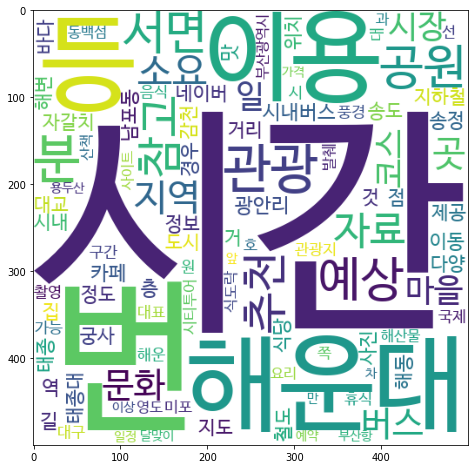

In [22]:
from wordcloud import WordCloud

# 워드클라우드 객체 생성
wordcloud = WordCloud(font_path='NanumBarunGothic',
                    background_color='white',
                    width=500, height=500,
                    max_words=100, max_font_size=300)

# 사용자 데이터를 이용해 워드클라우드 적용
wc=wordcloud.generate_from_frequencies(nouns_dict)

# 워드클라우드 화면 출력
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.show()

9. 빈도수가 5 미만인 단어를 이용한 워드클라우드

In [23]:
nouns_txts=[ t for t in nouns_tup if t[-1] < 10]
nouns_txts[-5:]

[('아미', 1), ('충청', 1), ('서동', 1), ('기념관', 1), ('양강', 1)]

In [24]:
nouns_dict = dict(nouns_txts)

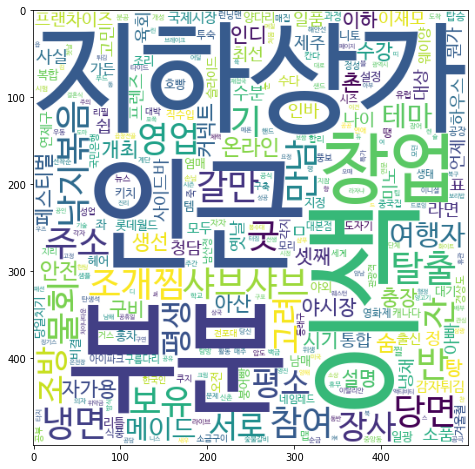

In [25]:
from wordcloud import WordCloud

# 워드클라우드 객체 생성
wordcloud = WordCloud(font_path='NanumBarunGothic',
                    background_color='white',
                    width=500, height=500,
                    max_words=300, max_font_size=300)

# 사용자 데이터를 이용해 워드클라우드 적용
wc=wordcloud.generate_from_frequencies(nouns_dict)

# 워드클라우드 화면 출력
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.show()